#Short Data Science Project (SDSP)

#### Ozar Ömer Uncu - 21727815 
#### Uğurcan Bağrıyanık -  21526701

##Problem
There are some diseases which are hard to diagnose by physicians. For instance, the disease 
may be rare and the physician responsible has no experience on that disease whatsoever. 
Or, there may be other diseases with similar symptoms and the physician can not make sure 
about her/his diagnosis. Whatever the reason is, this sort of cases typically result in 
unnecessary and expensive tests, e.g., blood work, x-rays, MRIs, etc. Besides wasting 
valuable resources, putting patients into distressing situations is also an issue. Therefore, 
diagnosing a disease by using resources optimally and without sacrifing the healthcare 
quality is of great importance.

In [64]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

df = pd.read_excel (r'sdsp_patients.xlsx')
print (df)
df.describe()

print(len(df.columns))
group=len(df.columns)/3
print(group)
df = df.dropna()
df.isnull().sum()



df=df.replace(to_replace="Yes",value=1)
df=df.replace(to_replace="No",value=0)

disease = {"Disease_1":1,"Disease_2":2,"Disease_3":3,"Disease_4":4}
df["Disease"] = [disease[item] for item in df["Disease"]]

gender = {'Male': 1,'Female': 2}
df["Feature_1"] = [gender[item] for item in df["Feature_1"]]


days = {"Every Day": 4, "1-2 Days a Week": 3,"3-4 Days a Week":2,"1-2 Days a Month":1}
df["Feature_28"] = [days[item] for item in df["Feature_28"]]


dayTime = {"Mornings":2,"No Difference":1,"Evenings":0}
df["Feature_29"] = [dayTime[item] for item in df["Feature_29"]]


df['Feature_3'] = pd.to_numeric(df['Feature_3'], downcast='float',errors='coerce')
df['Feature_47'] = pd.to_numeric(df['Feature_47'], downcast='float',errors='coerce')
df['Feature_48'] = pd.to_numeric(df['Feature_48'], downcast='float',errors='coerce')
df['Feature_49'] = pd.to_numeric(df['Feature_49'], downcast='float',errors='coerce')
df['Feature_50'] = pd.to_numeric(df['Feature_50'], downcast='float',errors='coerce')



print(df)
print(df.dtypes)
df.describe()
df=df.dropna()
df_dropped = df.drop("Disease",axis = 1)

       Disease Feature_1  Feature_2  ... Feature_48  Feature_49  Feature_50
0    Disease_1      Male       28.0  ...         No          No          No
1    Disease_1      Male       18.0  ...         No          No          No
2    Disease_1      Male       44.0  ...         No          No          No
3    Disease_1      Male       19.0  ...         No          No          No
4    Disease_1      Male       17.5  ...         No         Yes          No
..         ...       ...        ...  ...        ...         ...         ...
395  Disease_1    Female       36.0  ...         No          No          No
396  Disease_1      Male       60.0  ...         No          No          No
397  Disease_1    Female       41.0  ...         No          No          No
398  Disease_1      Male       37.0  ...         No          No          No
399  Disease_1      Male       30.0  ...         No          No          No

[400 rows x 51 columns]
51
17.0
     Disease  Feature_1  Feature_2  ...  Feature_48  Fe

Chossing most different columns from dataframe

Best alpha using built-in LassoCV: 0.020253
Best score using built-in LassoCV: 0.931858
Lasso picked 11 variables and eliminated the other 39 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

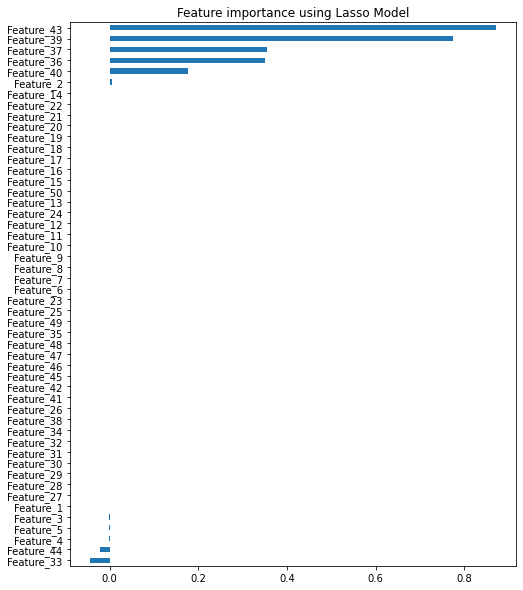

In [65]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

reg = LassoCV()
reg.fit(df_dropped, df['Disease'])
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(df_dropped, df['Disease']))
coef = pd.Series(reg.coef_, index = df_dropped.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")



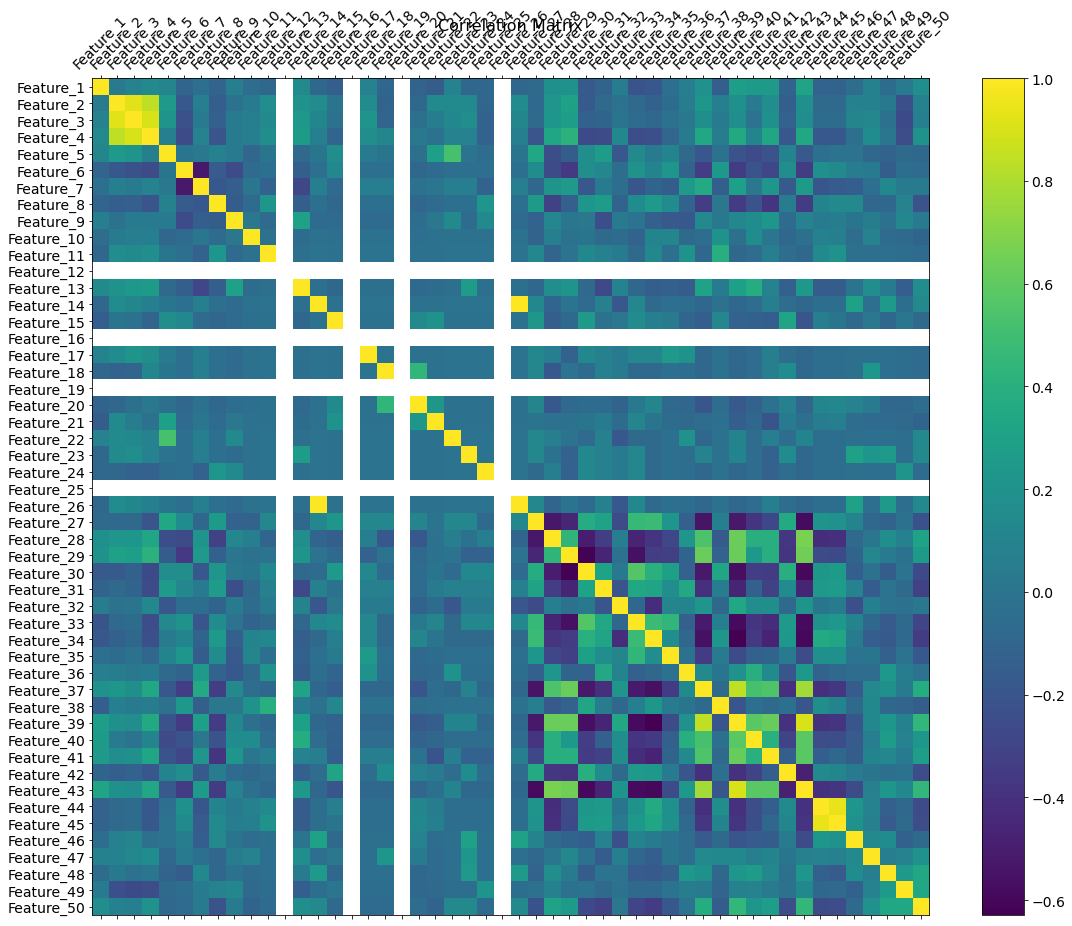

In [66]:

f = plt.figure(figsize=(19, 15))
plt.matshow(df_dropped.corr(), fignum=f.number)
plt.xticks(range(df_dropped.shape[1]), df_dropped.columns, fontsize=14, rotation=45)
plt.yticks(range(df_dropped.shape[1]), df_dropped.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


In [67]:

columns = np.full((df_dropped.corr().shape[0] ), True, dtype=bool)
for i in range(df_dropped.corr().shape[0]):
    for j in range(i+1, df_dropped.corr().shape[0]):
        if df_dropped.corr().iloc[i,j] >= 0.2 :
            if columns[j]:
                columns[j] = False
a = 0
print(columns)
for (columnName, columnData) in df_dropped.iteritems():
    if columns[a]==False:
        df_dropped = df_dropped.drop(labels = columnName, axis = 1)
    a+=1
df_dropped.describe()



[ True  True False False False  True  True  True  True  True False  True
 False  True  True  True False  True  True False False False False False
  True False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False]


,Feature_1,Feature_2,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_12,Feature_14,Feature_15,Feature_16,Feature_18,Feature_19,Feature_25,Feature_32
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.0,124.000000,124.000000,124.0,124.000000,124.0,124.0,124.000000
mean,1.475806,31.589113,0.137097,0.629032,0.137097,0.290323,0.024194,0.0,0.008065,0.048387,0.0,0.008065,0.0,0.0,0.806452
std,0.501440,13.958320,0.345345,0.485024,0.345345,0.455753,0.154273,0.0,0.089803,0.215453,0.0,0.089803,0.0,0.0,0.396682
min,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
25%,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000
50%,1.000000,29.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000
75%,2.000000,39.250000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000
max,2.000000,84.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000


Can not choose features from correlation map. We have some blank correlations and cannot decrease columns to low count. So we choose lasso model for see importances and detect best columns for take these to model.

**You can add/remove new features from below**

In [68]:
features = ["Feature_43","Feature_40","Feature_39","Feature_37","Feature_36"]

df_last = df[features]

In [69]:



from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(df_last, df['Disease'], test_size=0.40)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

LR = LogisticRegression()
LR.fit(X_train,y_train)
predd = LR.predict(X_test)
print(confusion_matrix(y_test, predd))
print(classification_report(y_test, predd))


[[29  0  0]
 [ 0 19  0]
 [ 0  0  2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00         2

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [70]:
import joblib

dict = {"model":LR,"features":features}


joblib.dump(dict,"LR.joblib")

joblib.dump(dict,"LR.sav")




['LR.sav']